## Objective

The objective of this project is to develop a deep learning model that can detect whether a person is wearing a mask, not wearing a mask or incorrectly wearing a mask. This first requires a model to detect a face, then a model to classify if a mask is worn correctly.

## Imports

In [10]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as ET
import os
import cv2
from matplotlib import pyplot as plt

## Helpers

In [40]:
def parse_xml(filename):
    dirname = os.path.abspath('')
    absolute_path = os.path.join(dirname, filename)
    tree = ET.parse(absolute_path)
    root = tree.getroot()

    height = int(root.find('size').findtext('height'))
    width = int(root.find('size').findtext('width'))
    file = root.findtext('filename') # need this?
    boxes = []

    for obj in root.findall('object'):
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.findtext('xmin'))
        ymin = int(bndbox.findtext('ymin'))
        xmax = int(bndbox.findtext('xmax'))
        ymax = int(bndbox.findtext('ymax'))
        mask = obj.findtext('name')
        boxes.append([mask, xmin, ymin, xmax, ymax])

    return boxes, (height, width)

In [51]:
cmap = {
    'without_mask': (255, 0, 0),
    'with_mask': (0, 255, 0),
    'mask_weared_incorrect': (255, 255, 0)
}

def view_annotations(filename):
    dirname = os.path.abspath('')
    absolute_path = os.path.join(dirname, filename)
    bgr_img = cv2.imread(absolute_path)
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    
    img_path = 'data/annotations/' + filename.split('/')[2][:-3] + 'xml'
    annotations, dim = parse_xml(img_path)
    for annot in annotations:
        start_point = (annot[1], annot[2])
        end_point = (annot[3], annot[4])
        mask_status = annot[0]
        color = cmap[mask_status]
        cv2.rectangle(rgb_img, start_point, end_point, color, 2)
        cv2.putText(rgb_img, mask_status, (annot[1] - 20, annot[2]), cv2.FONT_HERSHEY_SIMPLEX, 0.66, color, 1, cv2.LINE_AA)
    plt.imshow(rgb_img)

## Visualization

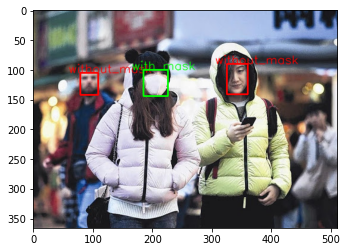

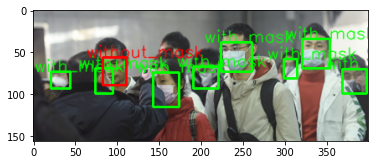

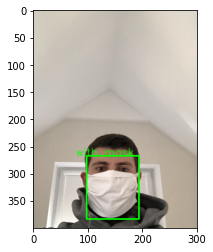

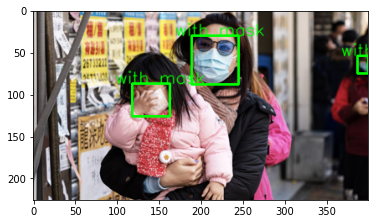

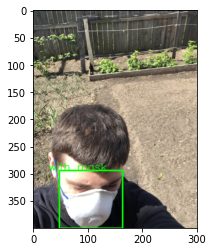

In [69]:
images = ['data/images/' + fp for fp in os.listdir('data/images')]
annotations = ['data/annotations/' + fp for fp in os.listdir('data/annotations')]

for i in range(5):
    plt.figure()
    view_annotations(images[i])

plt.show()